In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [53]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
df.shape

(1338, 7)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Missing Values

In [58]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Outliers

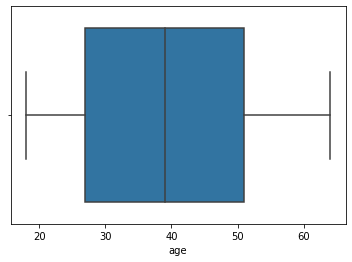

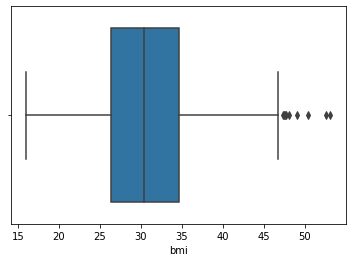

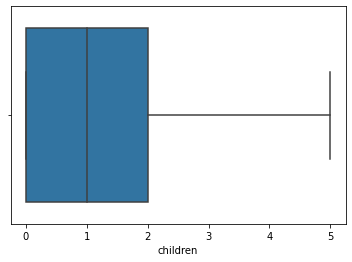

In [59]:
for i,col in enumerate(['age','bmi','children']):
    plt.figure(i)
    sns.boxplot(df[col])

In [60]:
### bmi column contains outliers
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange

In [61]:
col='bmi'
low,high=removeOutlier(df[col])
df[col]=np.where(df[col]>high,high,df[col])
df[col]=np.where(df[col]<low,low,df[col])

### Encoding Categorical Features

In [62]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [63]:
Sex=pd.get_dummies(df['sex'],drop_first=True)

In [64]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [65]:
Smoker=pd.get_dummies(df['smoker'],drop_first=True)

In [66]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [67]:
Region=pd.get_dummies(df['region'],drop_first=True)

In [68]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)


In [69]:
df=pd.concat([df,Sex,Smoker,Region],axis=1)
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Split Data into train and test

In [70]:
X=df.drop('charges',axis=1)
y=df['charges']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Creating Model

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
y_pred=rf_random.predict(X_test)

In [74]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8768306093195967

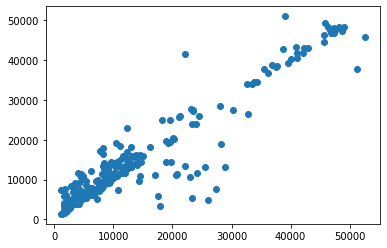

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
rf_random.score(X_train,y_train)

0.9738447861812854

In [77]:
rf_random.score(X_test,y_test)

0.8768306093195967

### Hyperparameter Tunning

In [78]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [86]:
prediction = rf_random.predict(X_test)


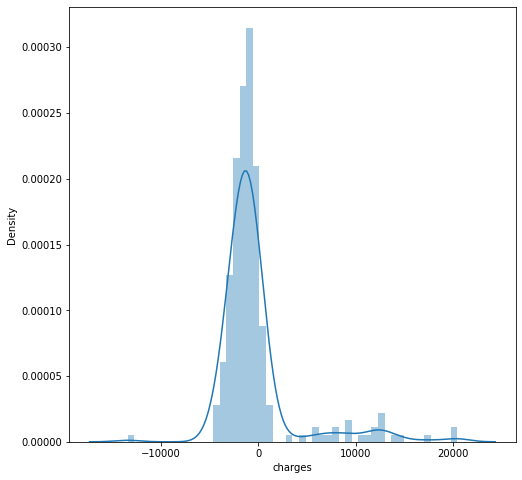

In [87]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

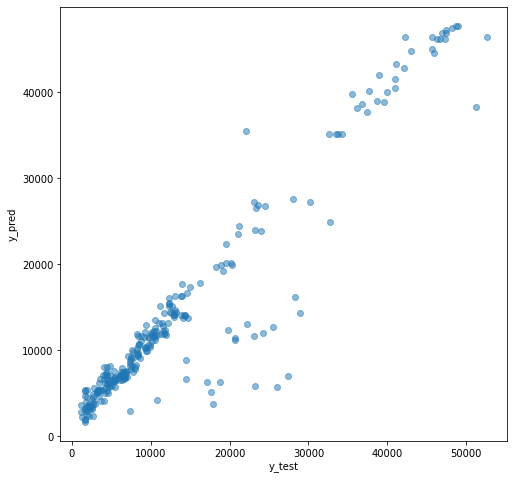

In [88]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [89]:
metrics.r2_score(y_test, prediction)

0.899914402749186

In [90]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
